In [32]:
# 19, 20강

import pandas as pd

s=pd.Series([100,200,300], index=['A','B','C'])
s

s.index

s.values

df19 = pd.DataFrame({"이름" : ["Q", "기본값", "중울", "감정맨"], 
                   "성별" : ["남자", "남자", "여자", "간성"], 
                   "나이" : [28, 20, 18, 28]}, index=['가','나','다','라'], columns = ["성별","나이","이름"])

df19

box=[['Q', '남자', 28], ["중울", "여자", 18], ["기본값", "간성", 20], ["감정맨", "간성", 28]]
box

a=pd.DataFrame(box, columns=["나이","성별","이름"], index=["가","나","다","라"])
a


# 21강 (통계함수 : groupby)

df21=pd.read_csv("gapminder.tsv", sep='\t')
df21

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

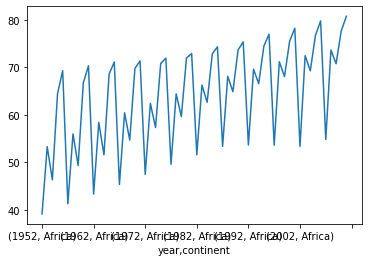

In [30]:
# 집단화 하고 싶은 열 이름
result=df21.groupby(['year', 'continent'])['lifeExp'].mean()
print(result)

result.plot()  #선그래프

In [31]:
df21.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [41]:
#22강

df22 = pd.read_csv("person_info.csv", encoding='euc-kr')
df22

,이름,출생일,사망일,나이,직업
0,홍길동,1920-07-25,1958-04-16,37,회사원
1,이순신,1876-06-13,1937-10-16,61,군인
2,이홍길,1820-05-12,1910-08-13,90,의사
3,곽재우,1867-11-07,1934-07-04,66,연구원
4,신나라,1907-05-27,1964-04-14,56,연구원
5,오기영,1813-03-15,1858-06-16,45,연구원
6,기충현,1912-06-23,1954-06-07,41,회사원
7,심기한,1777-04-30,1855-02-23,77,백수


In [43]:
df22['이름']

0    홍길동
1    이순신
2    이홍길
3    곽재우
4    신나라
5    오기영
6    기충현
7    심기한
Name: 이름, dtype: object

In [47]:
df22.iloc[[0, 5], [0, 4]]

,이름,직업
0,홍길동,회사원
5,오기영,연구원


In [50]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      8 non-null      object
 1   출생일     8 non-null      object
 2   사망일     8 non-null      object
 3   나이      8 non-null      int64 
 4   직업      8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [60]:
df22['출생일'] = pd.to_datetime(df22['출생일'])
df22['사망일'] = pd.to_datetime(df22['사망일'])
df22['생존일'] = df22['사망일'] - df22['출생일']
print(df22['생존일'])

0   13779 days
1   22404 days
2   32964 days
3   24345 days
4   20777 days
5   16529 days
6   15324 days
7   28422 days
Name: 생존일, dtype: timedelta64[ns]


In [63]:
df22.columns
name = df22['이름']
name.replace("홍길동", "장길산")

0    장길산
1    이순신
2    이홍길
3    곽재우
4    신나라
5    오기영
6    기충현
7    심기한
Name: 이름, dtype: object

In [64]:
age=df22['나이']
age.std()

18.325918413937288

In [68]:
df22[(df22['직업']=='연구원') & (df22['나이'] > df22['나이'].mean())]

,이름,출생일,사망일,나이,직업,생존일
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days


In [75]:
# 23강

df23=pd.read_csv('person_info.csv', encoding='cp949')
df23
df23.to_excel("my_data2.xlsx")
df23.to_pickle("my_data2.pickle")